In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN


C:\Users\lOvIn\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
list_of_tickers_data = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers = list_of_tickers_data.Symbol.to_list()

list_of_tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',
 'COO',


In [3]:
# 6 months worth of data
start = dt.datetime(2024,6,1)
end = dt.datetime(2024,12,1)

snp500 = yf.download(list_of_tickers, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-01 00:00:00 -> 2024-12-01 00:00:00)')


Save a copy of S&P500

In [4]:
snp500.to_csv("snp_500.csv")

In [5]:
snp500 = snp500["Close"]

In [6]:
snp500_1 = snp500.copy()
snp500_1 = snp500_1.drop(columns=['BRK.B', 'BF.B'])

In [7]:
snp500_1.shape

(126, 501)

In [8]:
# Check for Null Values
snp500_1.isnull().sum().sort_values(ascending=False)

Ticker
SW      23
A        0
NEE      0
NVDA     0
NUE      0
        ..
EQR      0
EQIX     0
EPAM     0
EOG      0
ZTS      0
Length: 501, dtype: int64

In [9]:
snp500_1 = snp500_1.dropna(how='any')
snp500_1 = snp500_1.fillna(method="ffill")

C:\Users\lOvIn\AppData\Local\Temp\ipykernel_18468\2290948683.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  snp500_1 = snp500_1.fillna(method="ffill")


In [10]:
snp500_1_returns = snp500_1.pct_change().mean() * 252
snp500_1_returns

Ticker
A       0.259461
AAPL    0.128769
ABBV    0.318372
ABNB   -0.195734
ABT     0.416967
          ...   
XYL    -0.094435
YUM     0.230285
ZBH     0.166058
ZBRA    0.674569
ZTS     0.033761
Length: 501, dtype: float64

In [11]:
snp500_1_vol = snp500_1.pct_change().std() * np.sqrt(252)
snp500_1_vol

Ticker
A       0.257167
AAPL    0.210814
ABBV    0.291982
ABNB    0.385890
ABT     0.195145
          ...   
XYL     0.246717
YUM     0.169145
ZBH     0.249927
ZBRA    0.272115
ZTS     0.223132
Length: 501, dtype: float64

In [12]:
snp500_1_df = pd.DataFrame({"returns":snp500_1_returns,
                           "volatility":snp500_1_vol}) 

In [13]:
snp500_1_df

,returns,volatility
Ticker,,
A,0.259461,0.257167
AAPL,0.128769,0.210814
ABBV,0.318372,0.291982
ABNB,-0.195734,0.385890
ABT,0.416967,0.195145
...,...,...
XYL,-0.094435,0.246717
YUM,0.230285,0.169145
ZBH,0.166058,0.249927


In [14]:
scaler = StandardScaler()
X = snp500_1_df
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.239786  , -0.30809184],
       [-0.51764674, -0.70429096],
       [-0.11453648, -0.01050987],
       ...,
       [-0.4383671 , -0.36997567],
       [ 0.6427672 , -0.18031966],
       [-0.71964215, -0.59900445]])

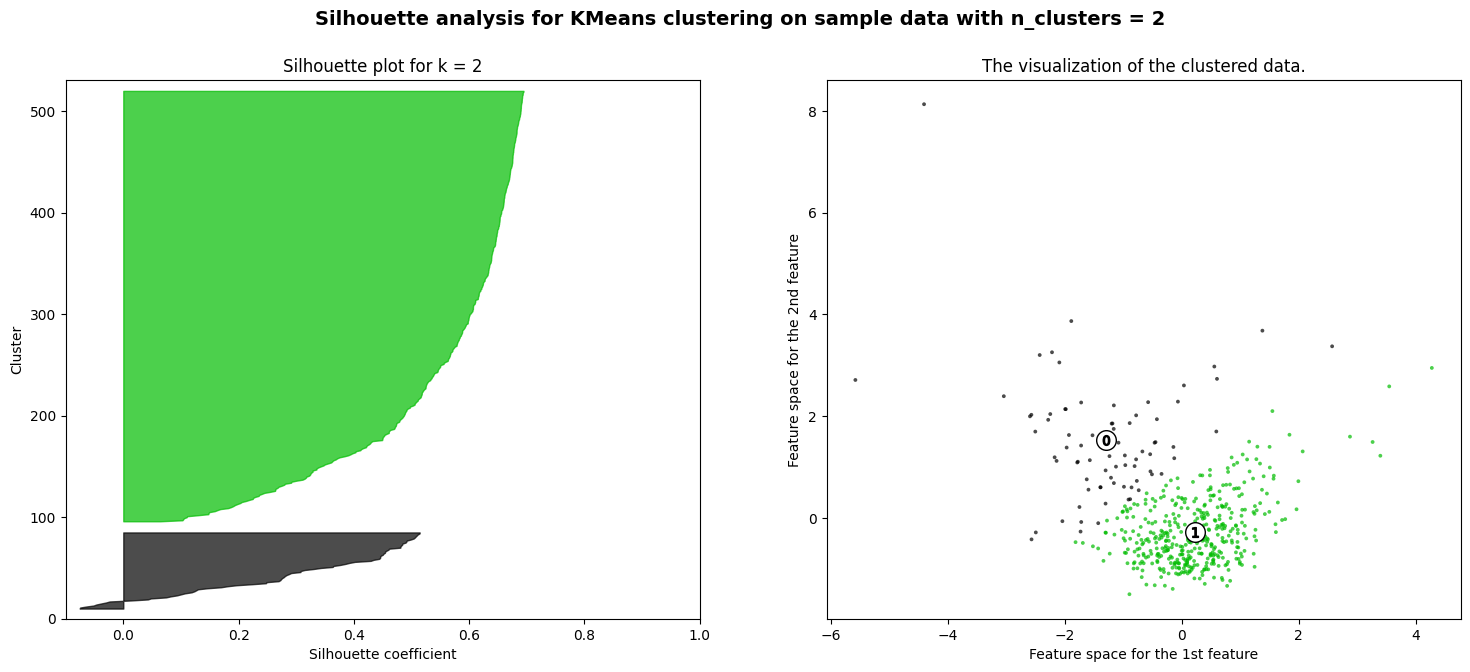

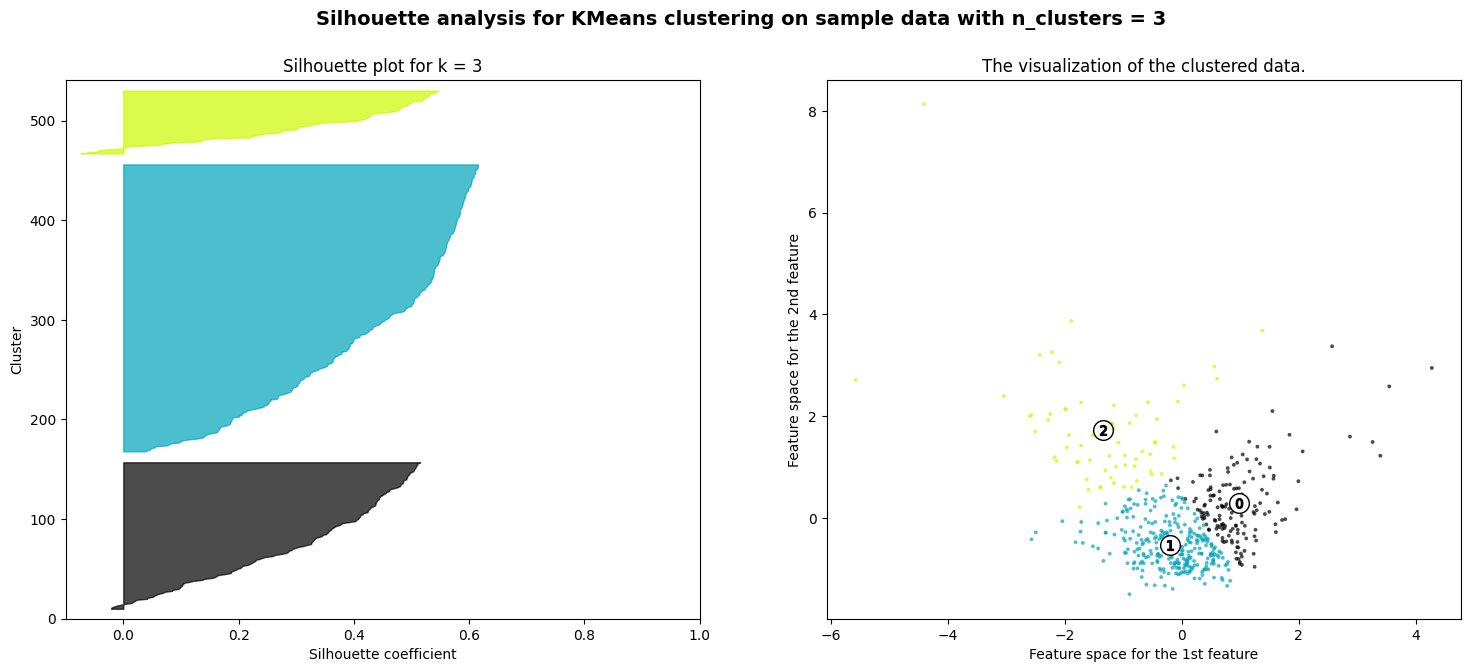

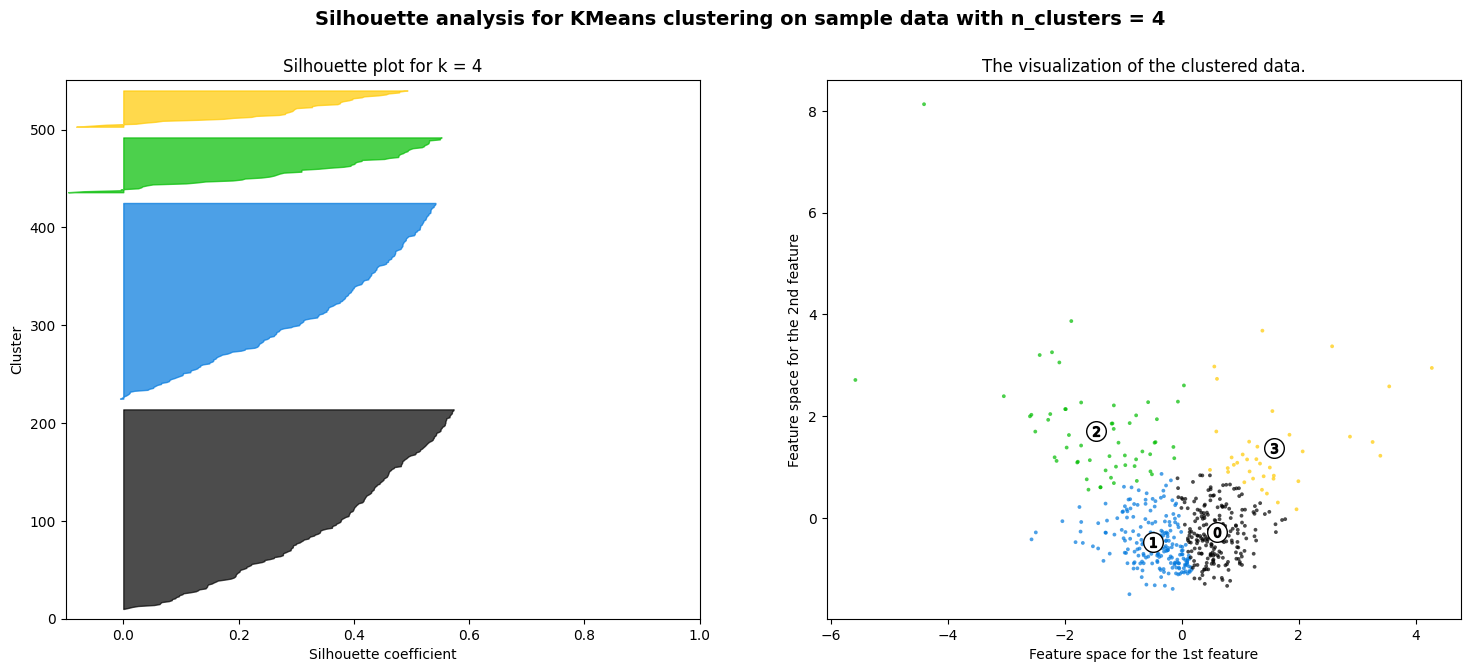

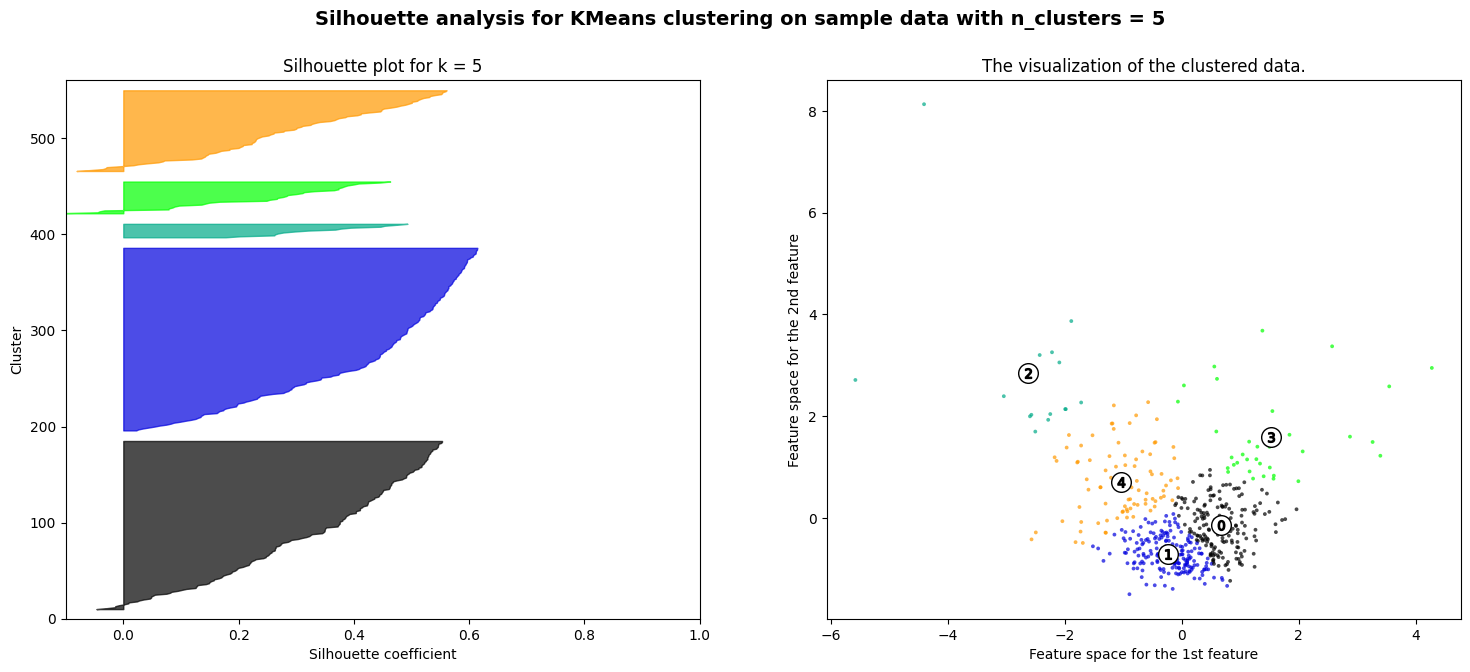

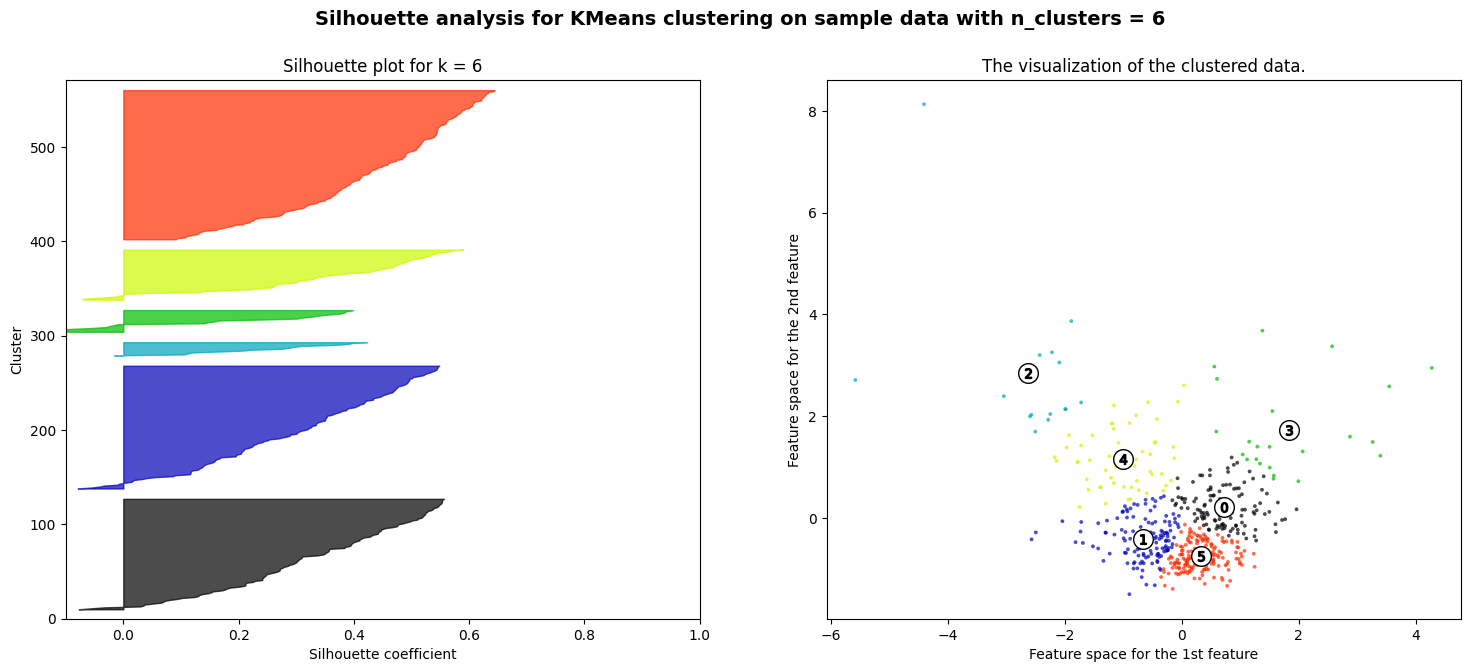

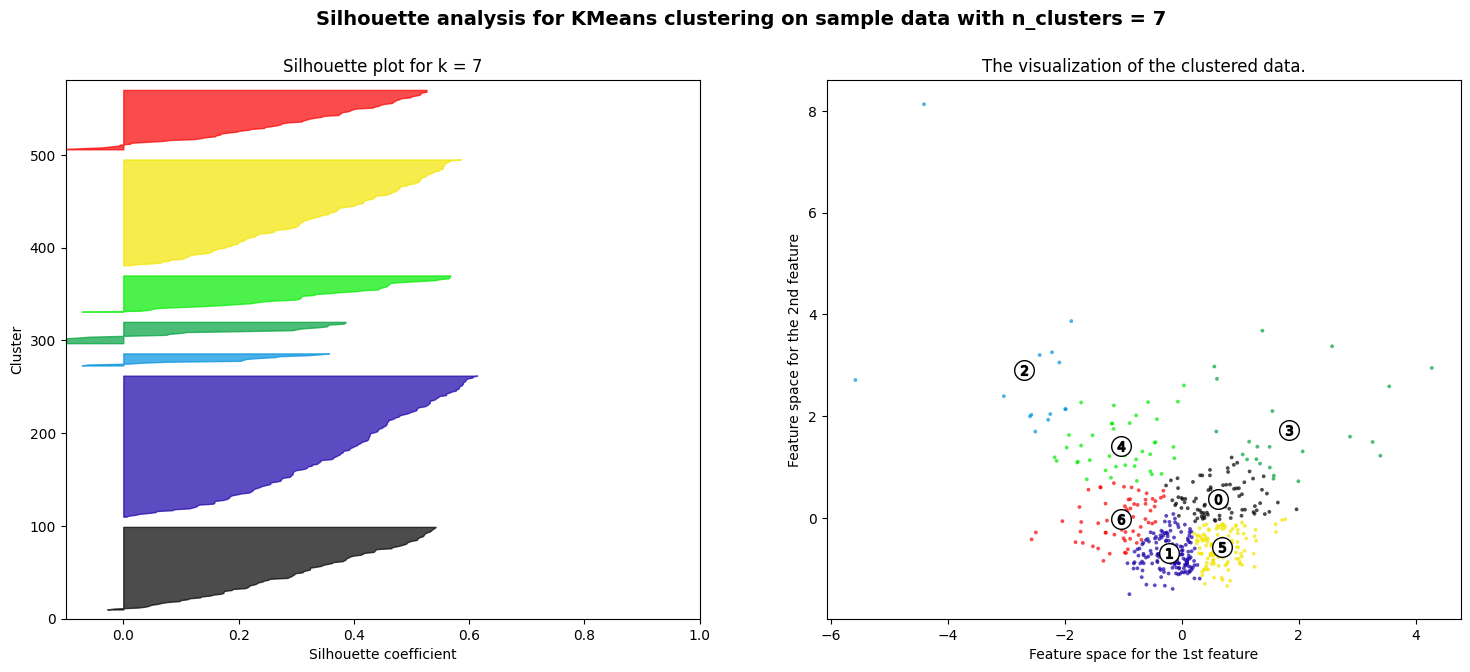

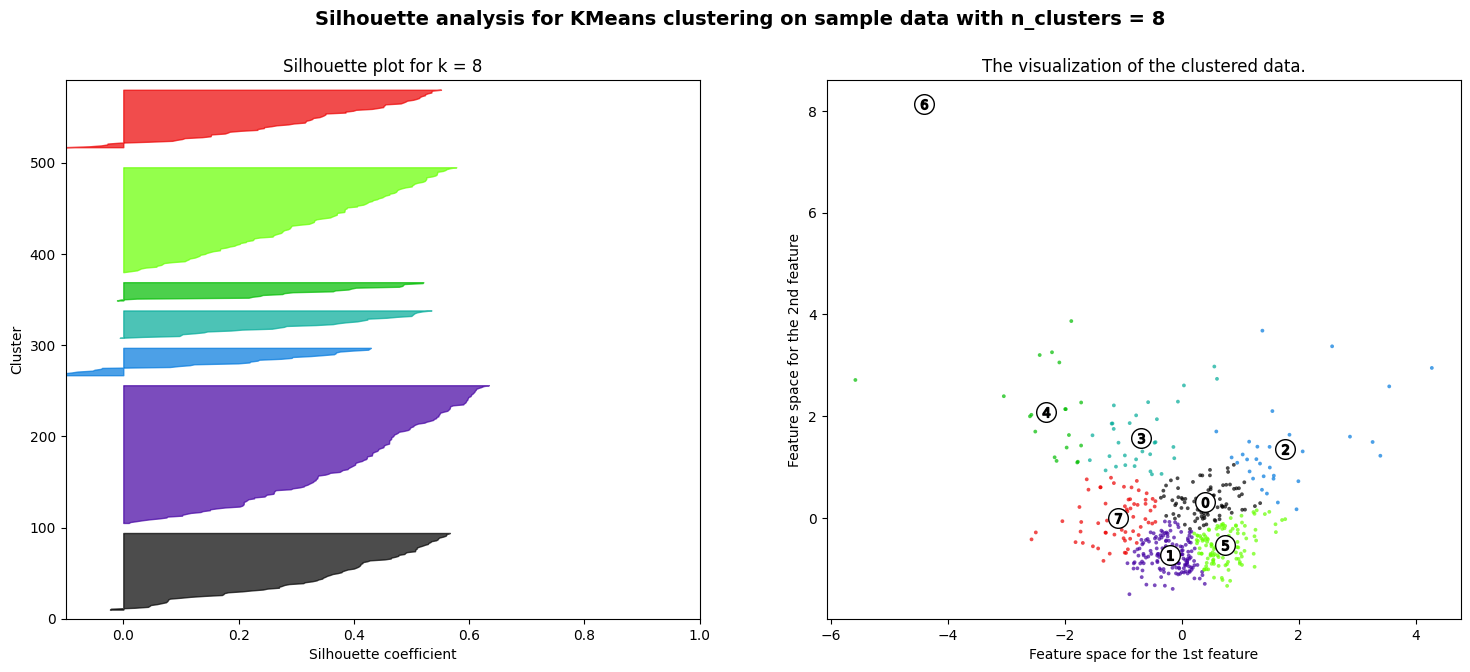

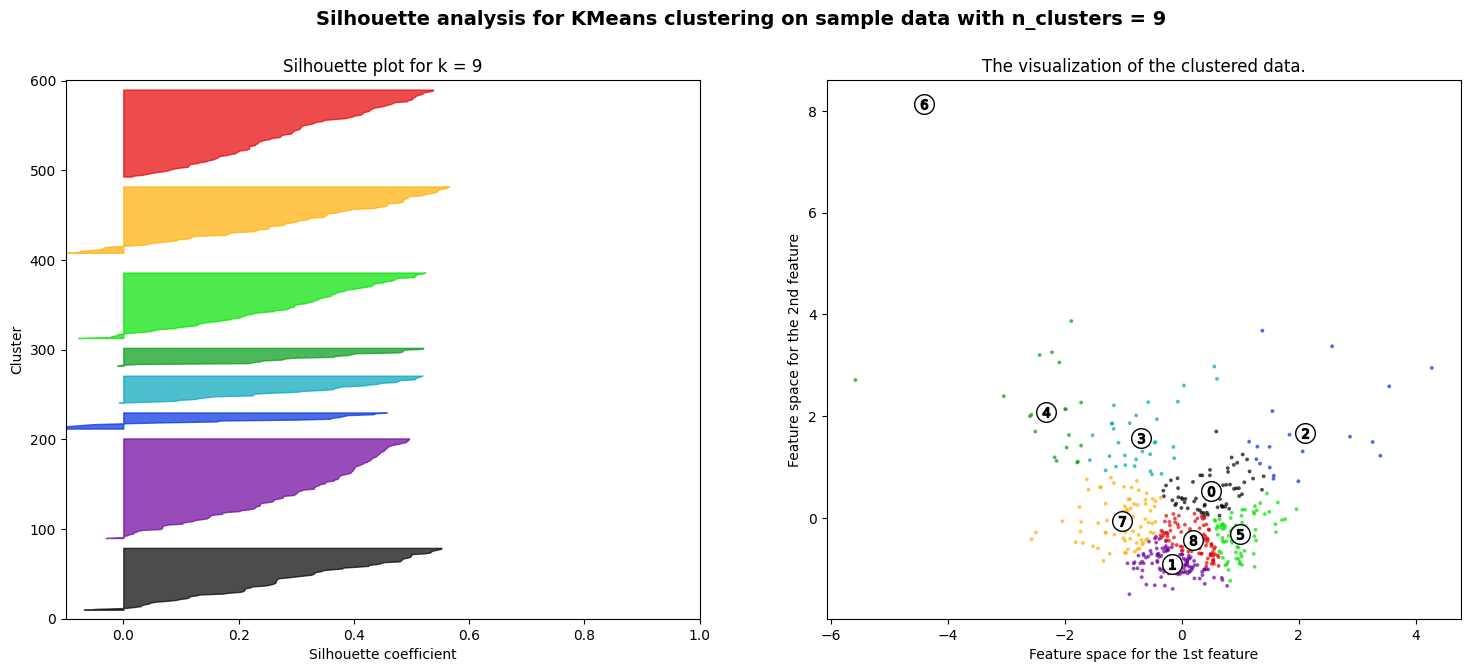

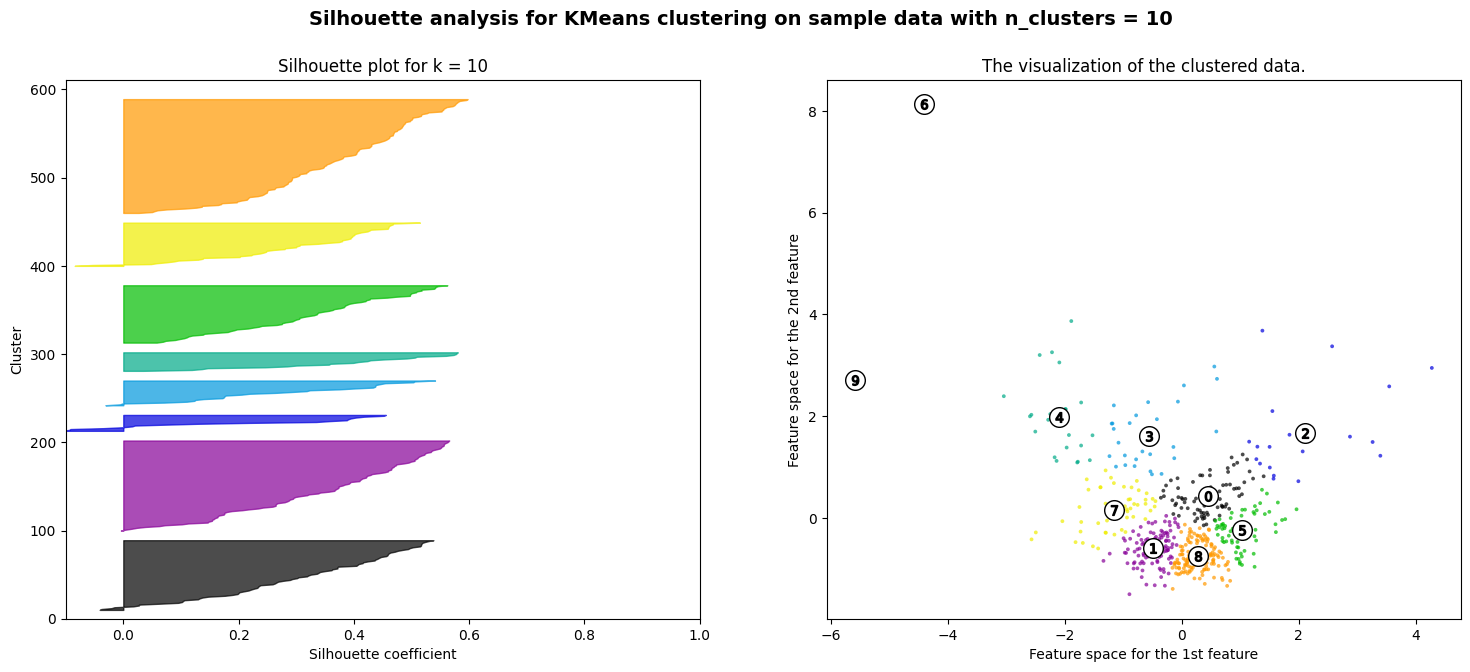

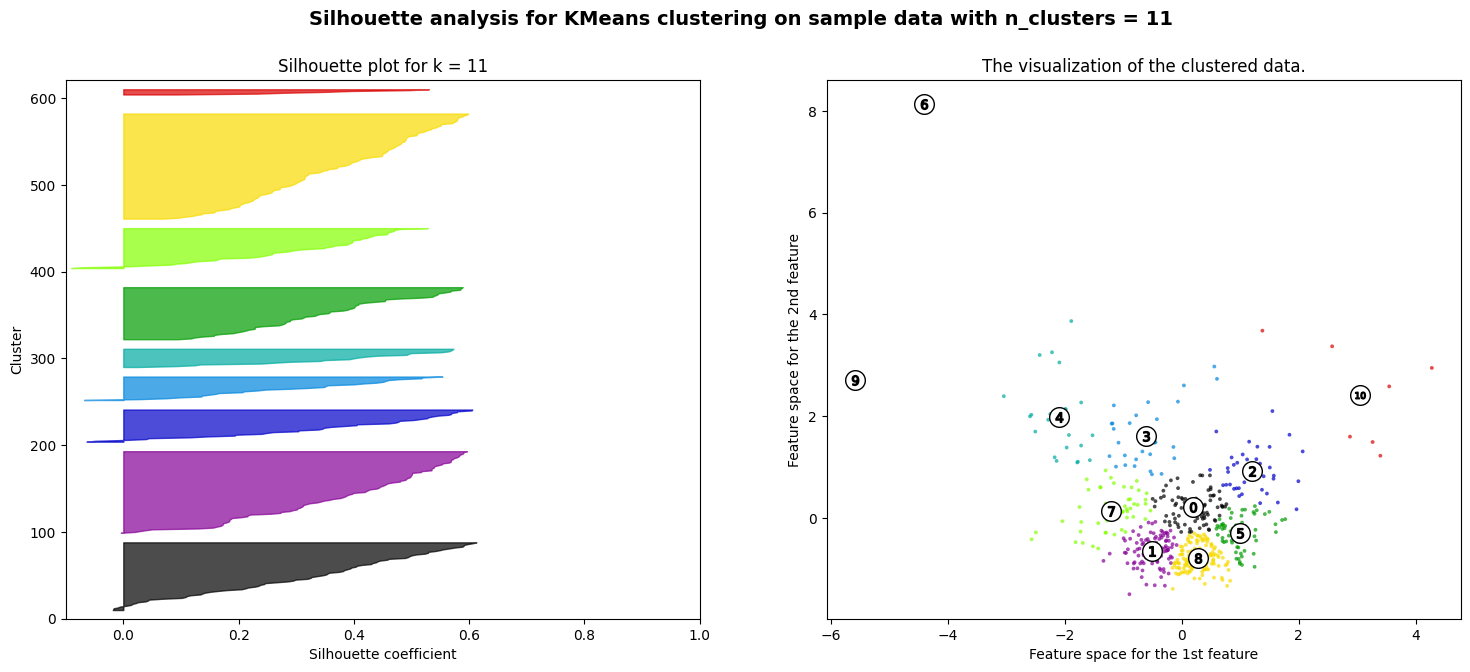

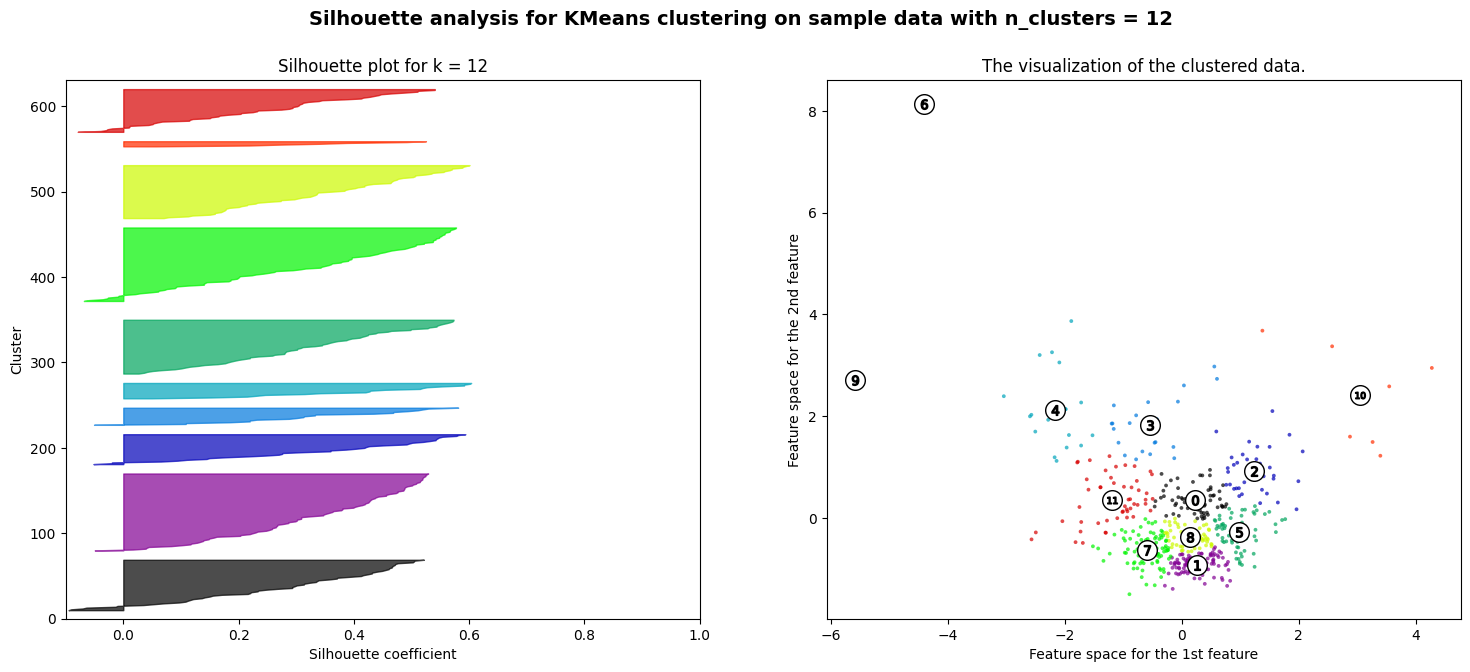

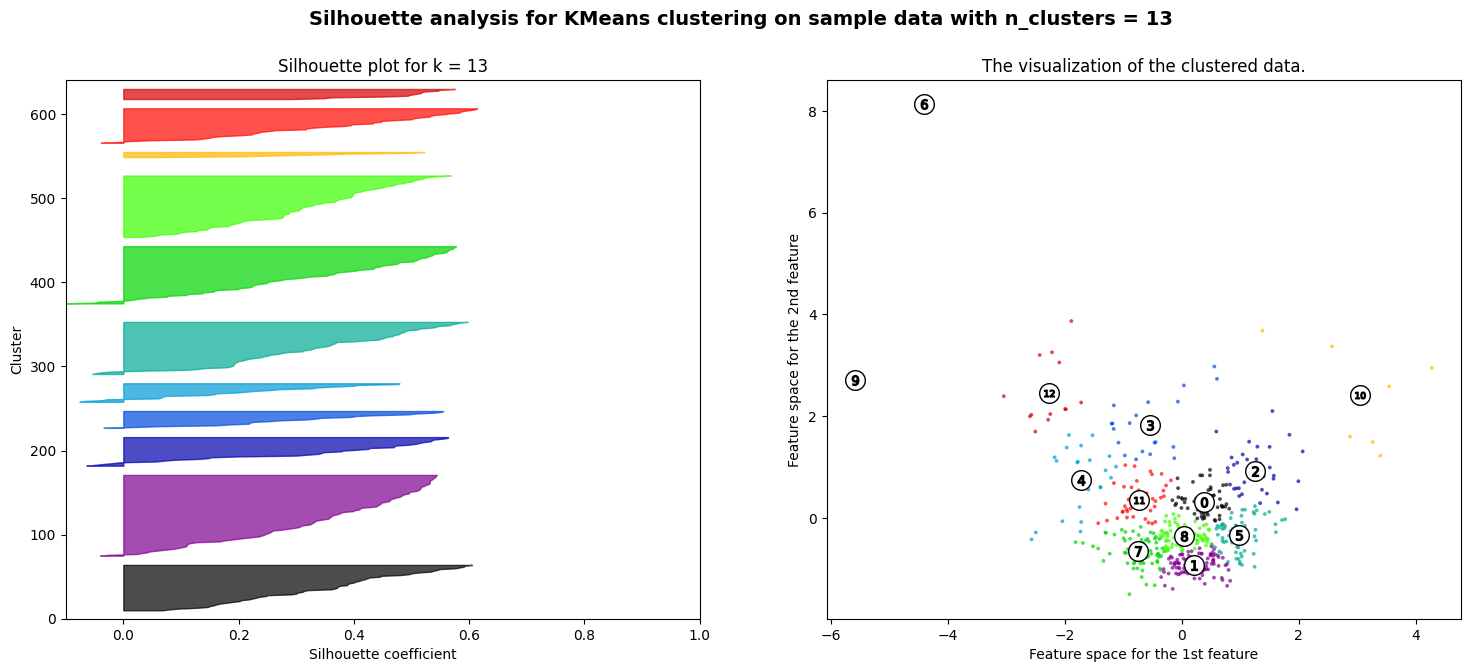

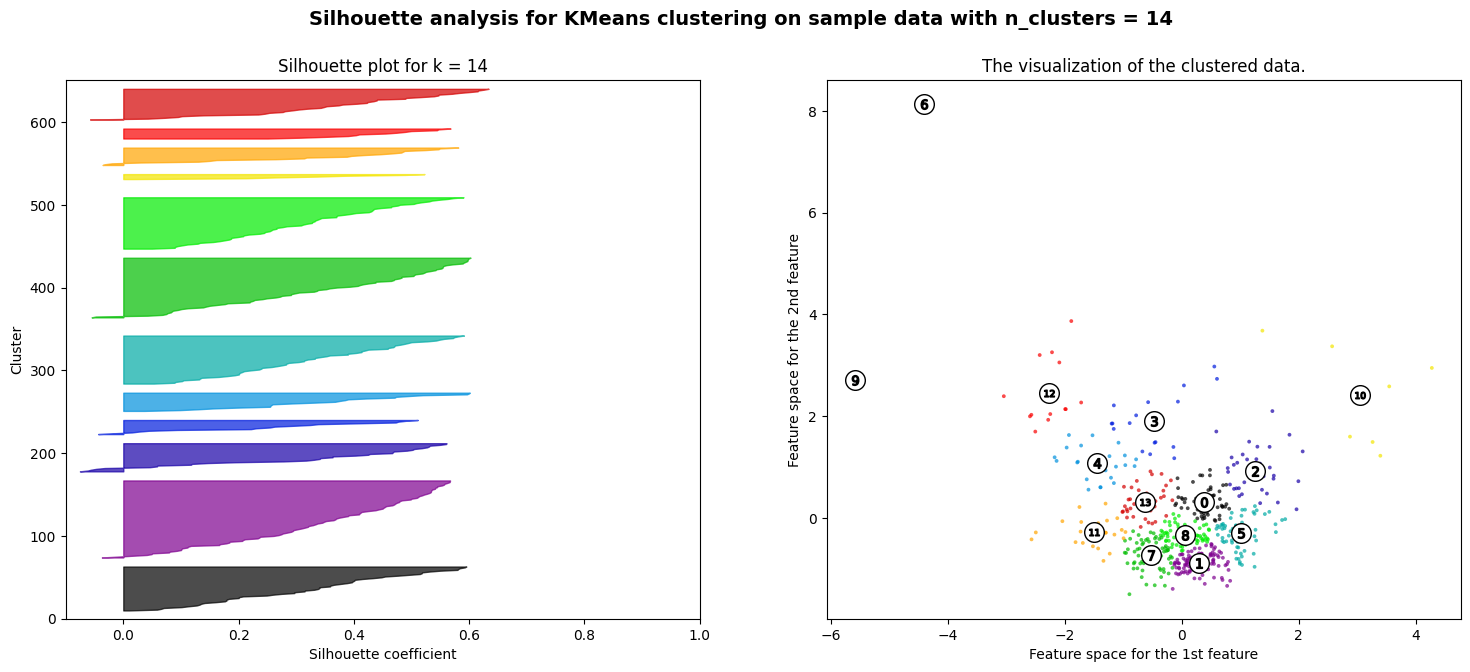

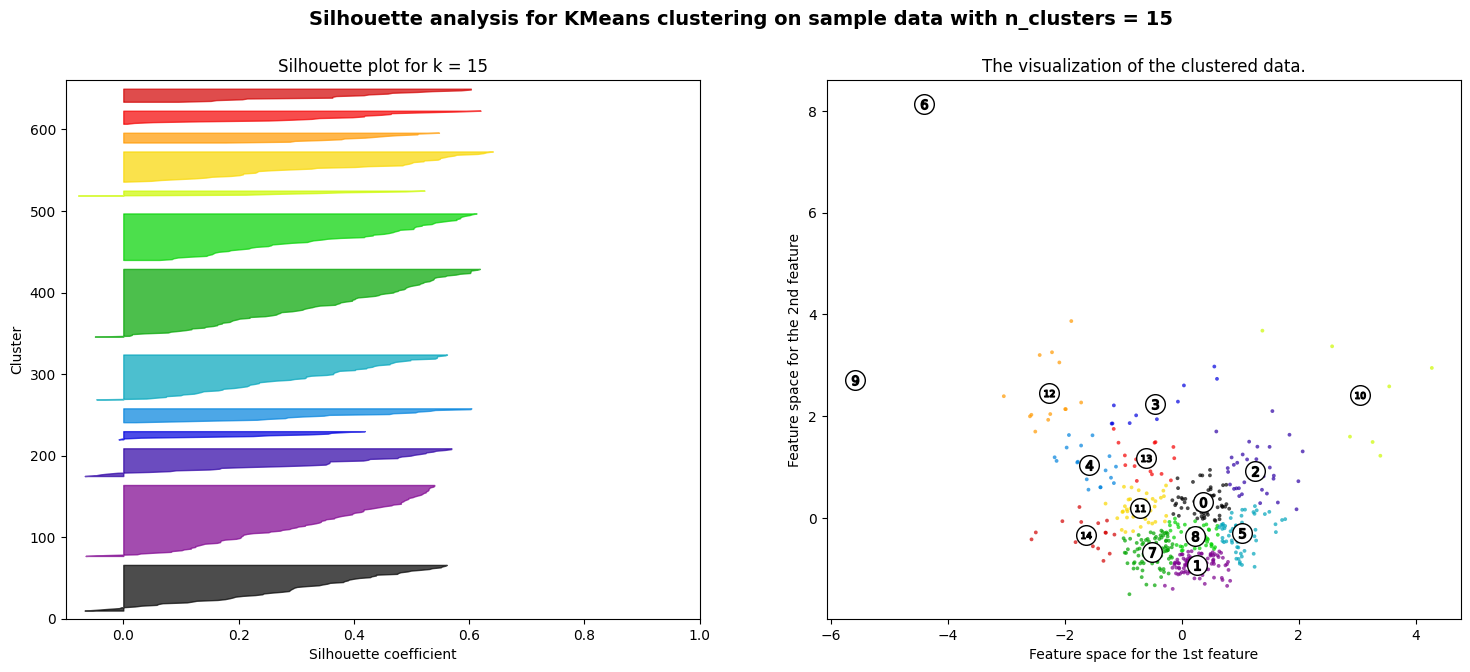

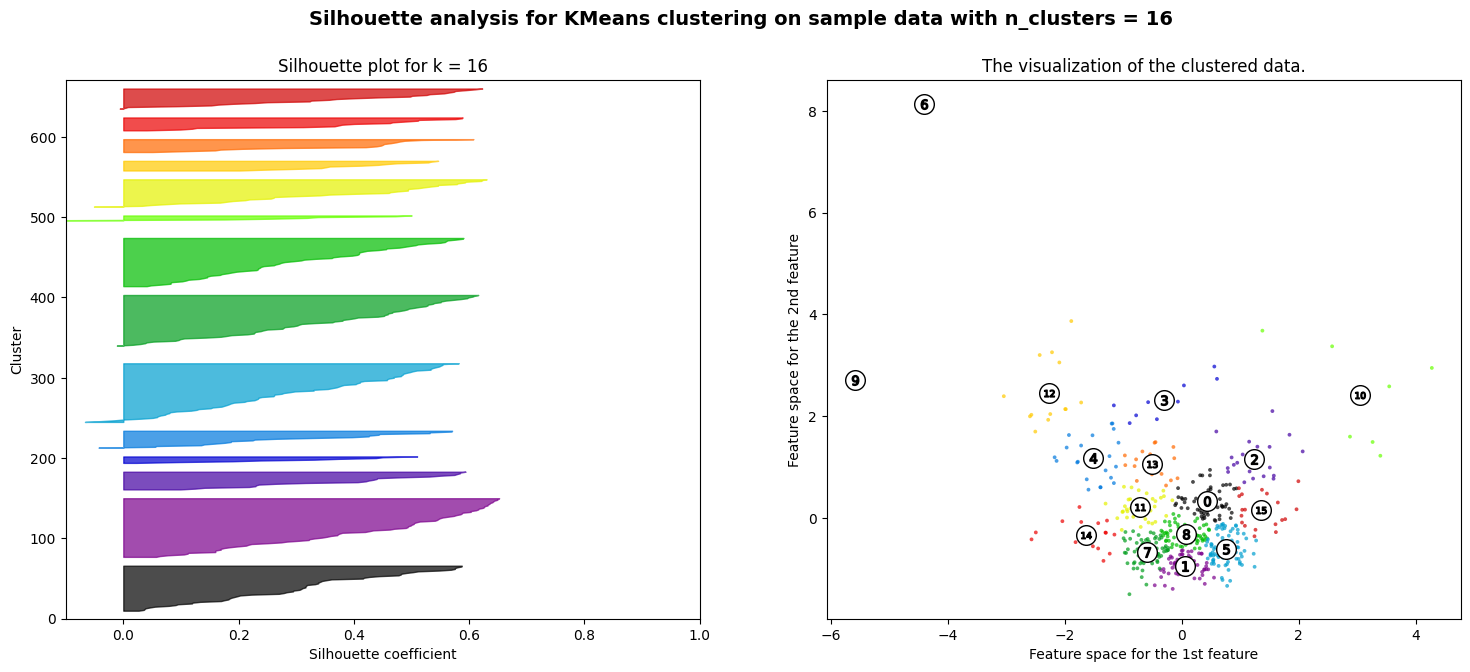

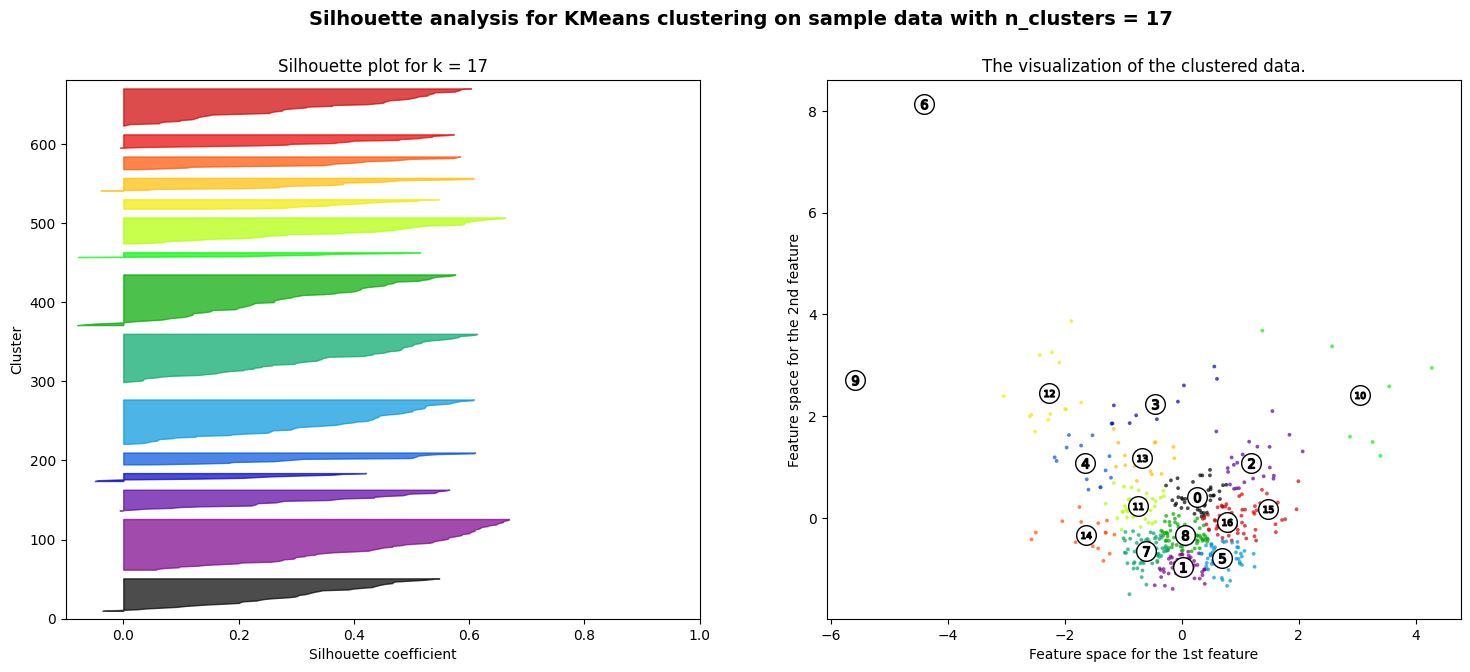

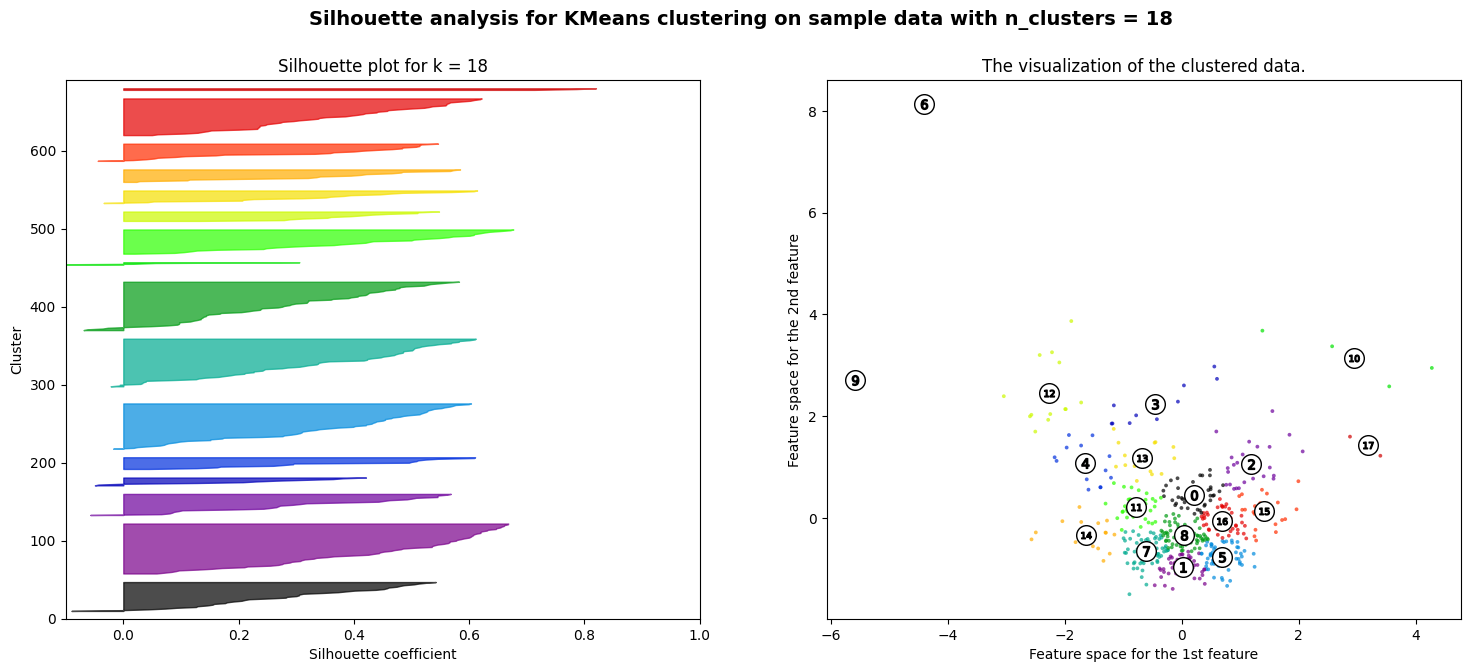

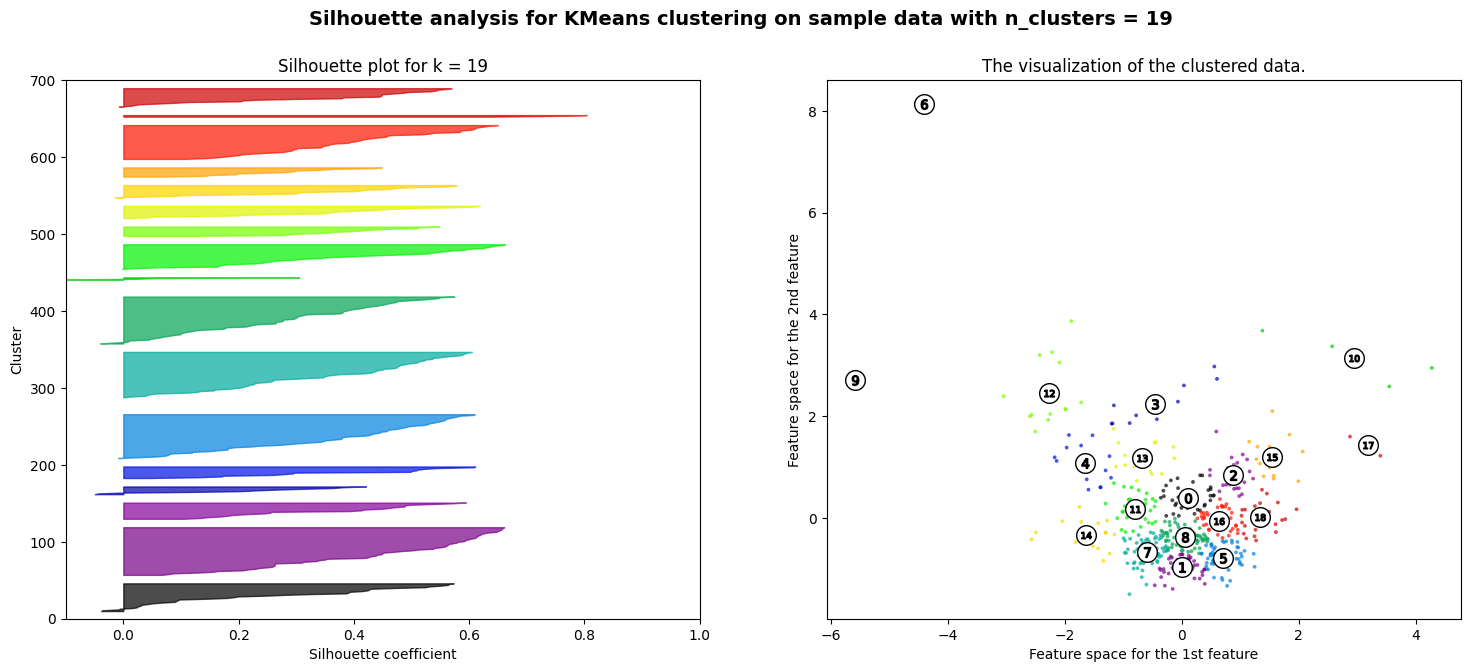

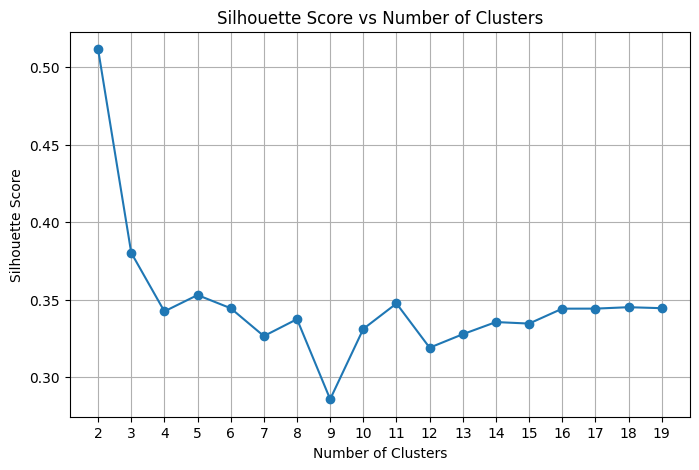

In [15]:
from matplotlib import cm

silhouette_scores = []
range_n_clusters = range(2, 20)

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=0)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    score = metrics.silhouette_score(X_scaled, cluster_labels, random_state=627)
    # To plot Silhouette scores graph
    silhouette_scores.append(score)

    sample_silhouette_values = metrics.silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        y_lower = y_upper + 10  # 10 for spacing

    ax1.set_title(f"Silhouette plot for k = {n_clusters}")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster")

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_scaled[:, 0], X_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
# Plot silhouette scores across cluster counts
plt.figure(figsize=(8, 5))
plt.xticks(np.linspace(0,20,21))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [28]:
kmeans = KMeans(n_clusters=11, n_init="auto", random_state=0)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

kmeans_cluster_stocks = pd.DataFrame({
    'stock':X.index,
    'cluster':kmeans.labels_
})

kmeans_groupby = kmeans_cluster_stocks.groupby("cluster")

for cluster, group in kmeans_groupby:
    print(f"\nCluster {cluster}:")
    print(group['stock'].tolist())

print("Cluster Sizes")
kmeans_groupby.size()


Cluster 0:
['ABBV', 'ADSK', 'AME', 'AMZN', 'APH', 'BAC', 'BBY', 'BEN', 'BKR', 'C', 'CARR', 'CAT', 'CHRW', 'CMG', 'CPRT', 'CSGP', 'CSX', 'CVS', 'DHI', 'DRI', 'DVA', 'EMR', 'EQT', 'ERIE', 'ETN', 'EXE', 'GE', 'GLW', 'GM', 'GPN', 'GS', 'HSIC', 'HUBB', 'INCY', 'IR', 'ISRG', 'IVZ', 'JBHT', 'JBL', 'JCI', 'JPM', 'KEYS', 'KMX', 'LDOS', 'LEN', 'LII', 'LULU', 'LUV', 'LVS', 'MCK', 'META', 'MKTX', 'MLM', 'MNST', 'NKE', 'NSC', 'ODFL', 'ORCL', 'PANW', 'PCAR', 'PHM', 'POOL', 'PRU', 'RL', 'RMD', 'ROK', 'RVTY', 'SCHW', 'STLD', 'SW', 'SWK', 'TFC', 'TKO', 'UHS', 'UNH', 'VMC', 'VTRS', 'WDAY', 'WYNN']

Cluster 1:
['A', 'AAPL', 'ACGL', 'AIG', 'AMCR', 'AMT', 'ANSS', 'AVY', 'AWK', 'AZO', 'BALL', 'BDX', 'CAG', 'CCI', 'CHD', 'CI', 'CL', 'CNP', 'COP', 'COST', 'CPB', 'CTRA', 'CVX', 'DD', 'DHR', 'ECL', 'EFX', 'EG', 'EMN', 'EOG', 'EXPD', 'EXR', 'FTV', 'GD', 'GEHC', 'GIS', 'HCA', 'HES', 'HOLX', 'HON', 'HRL', 'HST', 'HSY', 'INVH', 'IPG', 'JKHY', 'JNJ', 'JNPR', 'KDP', 'KHC', 'KMB', 'KO', 'LHX', 'LIN', 'LYB', 'MDLZ', '

cluster
0      79
1      95
2      38
3      28
4      22
5      61
6       1
7      47
8     122
9       1
10      7
dtype: int64

In [23]:
def getSector(ticker):
    try:
        sector = yf.Ticker(ticker).info['sector']    
        return sector
    except Exception as e:
        print(f"Error Fetching sector for {ticker}: {e}")

In [24]:
snp500_sector = pd.DataFrame({
    "tickers":snp500_1.columns
})

snp500_sector['sector'] = snp500_sector['tickers'].apply(getSector)

In [25]:
snp500_sector.groupby("sector")

In [27]:
sector_groupby = snp500_sector.groupby("sector")

for key, item in sector_groupby:
    print(sector_groupby.get_group(key))

print("Sector Sizes")
sector_groupby.size()

    tickers           sector
20      ALB  Basic Materials
37      APD  Basic Materials
83       CF  Basic Materials
117    CTVA  Basic Materials
125      DD  Basic Materials
139     DOW  Basic Materials
149     ECL  Basic Materials
156     EMN  Basic Materials
179     FCX  Basic Materials
237     IFF  Basic Materials
279     LIN  Basic Materials
290     LYB  Basic Materials
308     MLM  Basic Materials
314     MOS  Basic Materials
331     NEM  Basic Materials
341     NUE  Basic Materials
379     PPG  Basic Materials
405     SHW  Basic Materials
417    STLD  Basic Materials
468     VMC  Basic Materials
    tickers                  sector
87     CHTR  Communication Services
92    CMCSA  Communication Services
123    DASH  Communication Services
134     DIS  Communication Services
147      EA  Communication Services
188     FOX  Communication Services
189    FOXA  Communication Services
206    GOOG  Communication Services
207   GOOGL  Communication Services
243     IPG  Communication Serv

sector
Basic Materials           20
Communication Services    24
Consumer Cyclical         55
Consumer Defensive        36
Energy                    23
Financial Services        67
Healthcare                61
Industrials               71
Real Estate               31
Technology                82
Utilities                 31
dtype: int64